# Exercise Sheet for Interpolation and Approximation
----------------------------------------------------------

In [14]:
#load some python packages you will need
import numpy as np                 #this helps compute things
import matplotlib.pyplot as plt    #this helps plot things

### Enter your student ID number below, this will be used for a reproducable random number seed.

In [15]:
sid = 8325876  #  *** change this to your student number ***
seed = np.random.seed(sid)

----------------------------------------------------------

## Question 1
### a) Compute via interpolation and plot the Lagrange polynomial p(x) to $f(x) = cos(-2\pi x) + 0.4x^2$ over
### $(x_i,y_i) = [(7.2,21.04),(7.4,21.12),(7.6,22.39),(7.8,24.77]$ 


### b) Estimate the maximum absolute error bound for this Lagrange polynomial approximation over $\xi \in [x_0,x_n]$

In [16]:
x = np.arange(7,8,0.001)   #dummy range for function
y = np.cos(-2*np.pi*x) +0.4*x**2  #function f(x)


In [17]:
xi = np.array((7.2,7.4,7.6,7.8))   # points for interpolation
yi = y[np.digitize(xi,x)]


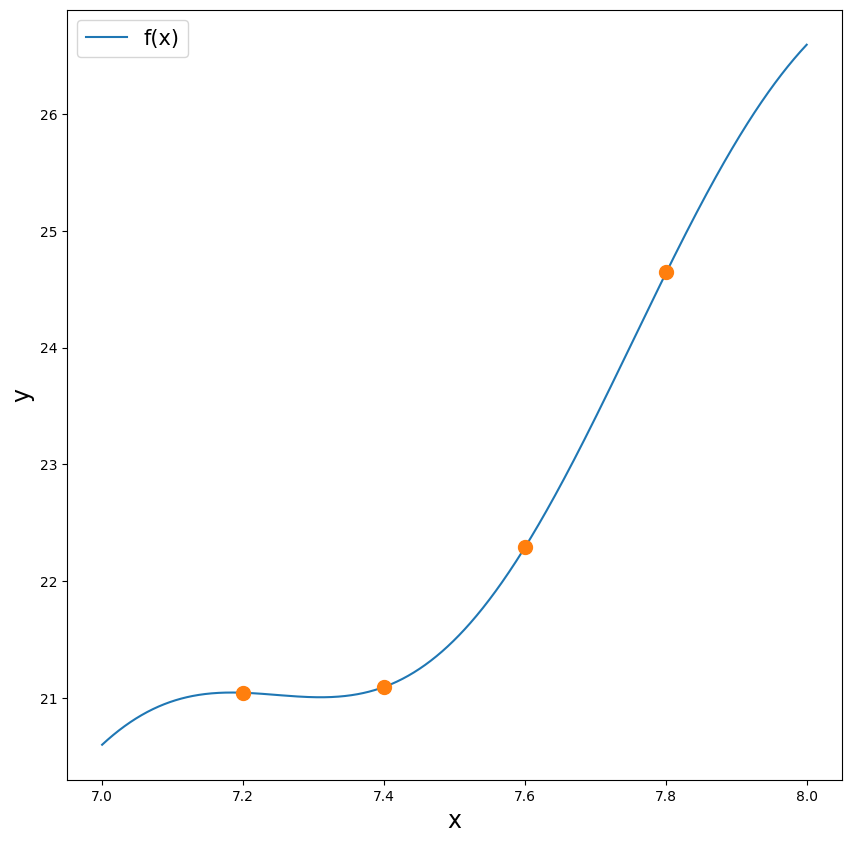

In [18]:
plt.figure(figsize=(10,10))
plt.plot(x,y,label='f(x)')  
plt.plot(xi,yi,'o',markersize=10)
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)
plt.legend(loc='best',fontsize=15)


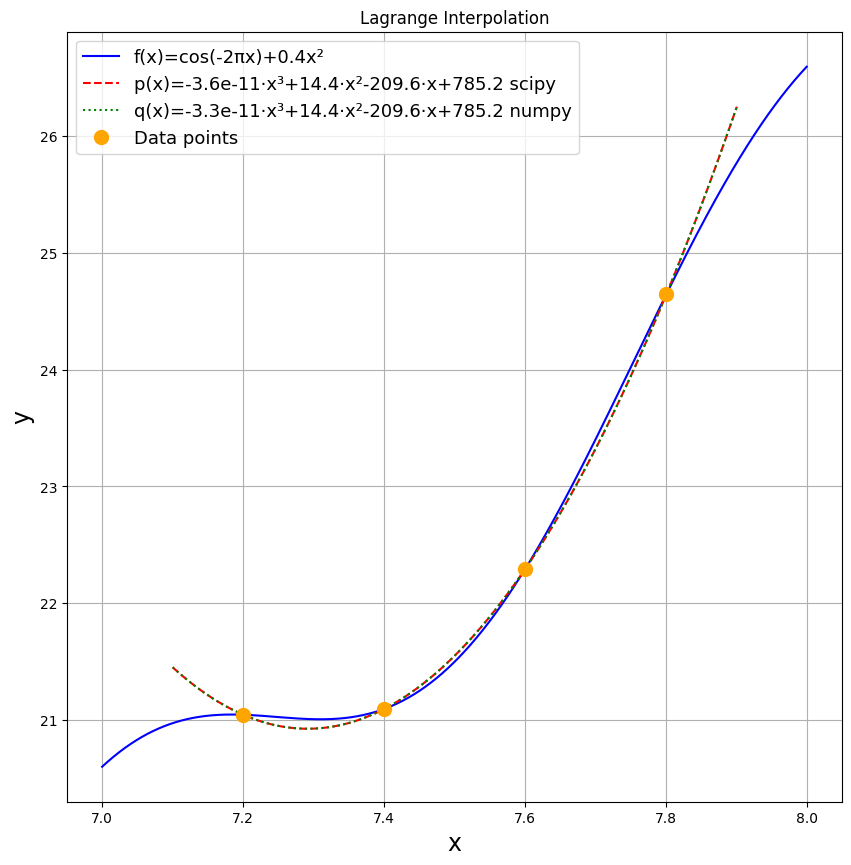

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def superscriptString( n ):
  uni= [ '\u2070', '\u00b9', '\u00b2', '\u00b3', '\u2074', '\u2075', '\u2076', '\u2077', '\u2078', '\u2079' ]

  inp= str( n )
  out= ''
  for i in range( len( inp ) ):
    out+= uni[ int( inp[ i : i+1 ] ) ]

  return out

def showPolynomicFunction( p ):
  pf= ''
  n= 0
  for i in range( len( p ), -1, -1 ):
    if n > 0 and p[i] > 0:
      pf+= '+'
    n+= 1

    if abs( p[i] ) < 0.1:
      pf+= f'{p[i]:.1e}'
    else:
      pf+= f'{p[i]:.1f}'
  
    if i == 1:
      pf+= f'·x'
    elif i > 0:
      pf+= f'·x' + superscriptString( i )

  return pf

def showPolynomicFunctionReverse( p ):
  pf= ''
  n= 0
  for i in range( len( p ) ):
    if n > 0 and p[i] > 0:
      pf+= '+'
    n+= 1

    if abs( p[i] ) < 0.1:
      pf+= f'{p[i]:.1e}'
    else:
      pf+= f'{p[i]:.1f}'
  
    j= len( p ) - i - 1
    if j == 1:
      pf+= f'·x'
    elif j > 0:
      pf+= f'·x' + superscriptString( j )

  return pf

p= interpolate.lagrange( xi, yi ) # perform Lagrange Interpolation with 4 data points
pString= showPolynomicFunction( p )

q= np.polyfit( xi, yi, deg=3 ) # perform Lagrange Interpolation with 4 data points
qString= showPolynomicFunctionReverse( q )

xP= np.linspace( 7.1, 7.9, 100 )  # array from 7.1 to 7.9 with 100 entries for...
yP= np.polyval( p, xP )           # ...some values of y=p(x)

xQ= np.linspace( 7.1, 7.9, 100 )  # array from 7.1 to 7.9 with 100 entries for...
yQ= np.polyval( q, xQ )           # ...some values of y=q(x)

plt.figure( figsize=(10,10) )
plt.plot( x, y, c='blue', label='f(x)=cos(-2πx)+0.4x²' )
plt.plot( xP, yP, c='red', linestyle='dashed', label=f'p(x)={pString} scipy' )
plt.plot( xQ, yQ, c='green', linestyle='dotted', label=f'q(x)={qString} numpy' )
plt.plot( xi, yi, 'o', markersize=10, c='orange', label='initial Data points' )
plt.xlabel( 'x', fontsize=17 )
plt.ylabel( 'y', fontsize=17 )
plt.title( 'Lagrange Interpolation' )
plt.grid( True )
plt.legend( loc='best', fontsize=13 )
plt.show()


#EOF

----------------------------------------------------------

## Question 2
### Assume linear interpolation with step size $\textbf{d}$ is used to approximate $y(x) = \pi x^7$
### What step size for linear interpolation do you need to have for an absolute error $E_{max} < 10^{-6}$?

----------------------------------------------------------

## Question 3
### When using Taylor polynomials to approximate $y = cos(-3 \pi x) + 3x$ over the range $x = [-0.25,0.25]$, about $x= 0$;  to what order $j$ would you need to compute the interpolating polynomial in order to keep the maximum absolute error smaller than $E_{j}(x) < 10^{-6}$?

Text(0, 0.5, 'y')

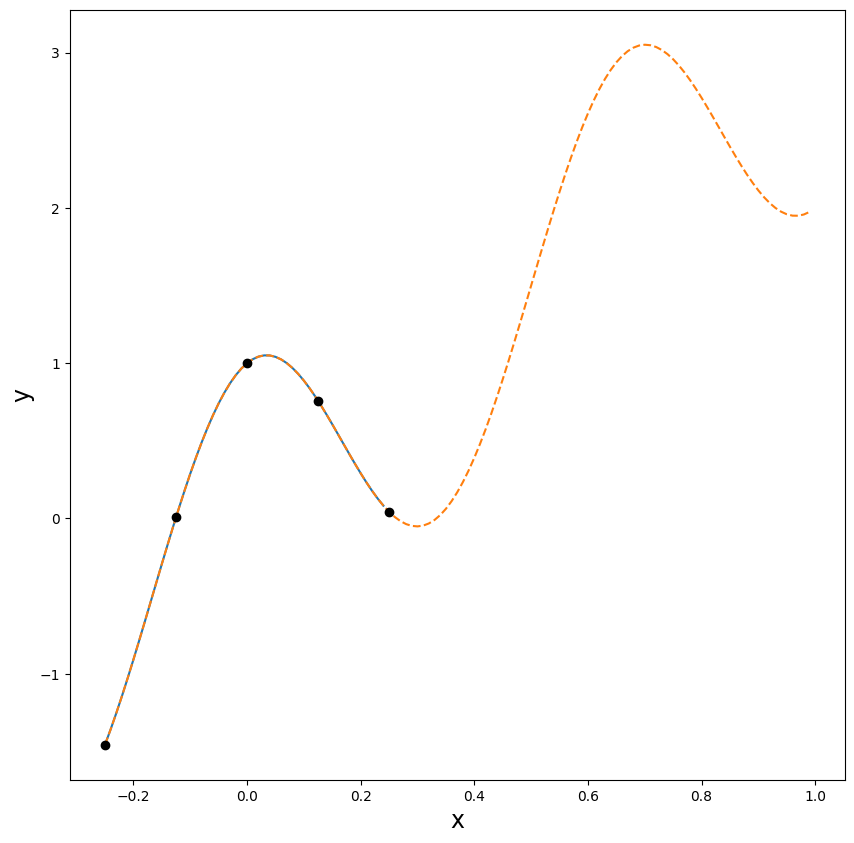

In [ ]:
xi = np.arange(-0.25,1,0.01)
xdum = np.arange(-0.25,0.25,0.01)
x = np.array([-0.25,-0.125,0,0.125,0.25])
y = np.cos(-3*np.pi*x) + 3*x
ydum = np.cos(-3*np.pi*xdum) + 3*xdum
yi = np.cos(-3*np.pi*xi) + 3*xi
plt.figure(figsize=(10,10))
plt.plot(xdum,ydum)
plt.plot(xi,yi,'--')
plt.plot(x,y,'o',c='black')
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)

----------------------------------------------------------

## Question 4
## Use bilinear interpolation to determine the value of the function $f(x,y) = z$  at the point $(x_r, y_r)$, given the below four data points $x_i, y_i$ with values $z_{i} = f(x_i,y_i)$


Text(0.9089675771489871, 0.4993228410105899, '($x_r,y_r)$')

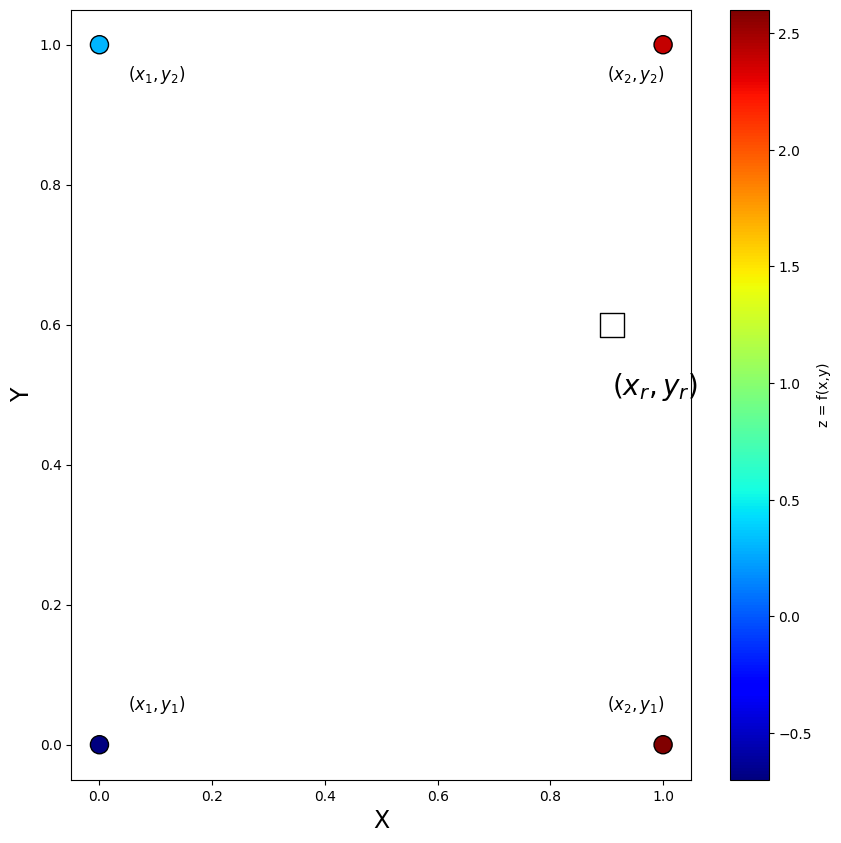

In [ ]:
#Known data points and function values.  Listed clockwise from the x_1,y_1 = (0,0) point.
xi = np.array([0,0,1,1])  #x_1,x_1,x_2,x_2
yi = np.array([0,1,1,0])  #y_1,y_2,y_2,y_1
zi = np.array([-0.7,0.3,2.4,2.6])  

#Randomly generate coordinates to find function value (z = f(x,y)) at 
xr = np.random.uniform()
yr = np.random.uniform()

#Visualize
plt.figure(figsize=(10,10))
plt.scatter(xi,yi,c=zi,s=170,marker='o',cmap='jet',edgecolor='black')
plt.colorbar(label='z = f(x,y)')
plt.xlabel('X',fontsize=17)
plt.ylabel('Y',fontsize=17)
plt.scatter(xr,yr,edgecolor='black',marker='s',s=290,c='white')
plt.text(0.05,0.05,'($x_1,y_1)$',fontsize=12)
plt.text(0.05,0.95,'($x_1,y_2)$',fontsize=12)
plt.text(0.9,0.95,'($x_2,y_2)$',fontsize=12)
plt.text(0.9,0.05,'($x_2,y_1)$',fontsize=12)
plt.text(xr,yr-0.1,'($x_r,y_r)$',fontsize=20)



